In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
data = pd.read_csv('/content/drive/My Drive/Data for Models/house_prediction.csv')

In [221]:
for col in data.columns:
  print(f'this unique values of {col} = {data[col].unique()}')

this unique values of Id = [   1    2    3 ... 1458 1459 1460]
this unique values of MSSubClass = [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
this unique values of MSZoning = ['RL' 'RM' 'C (all)' 'FV' 'RH']
this unique values of LotFrontage = [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
this unique values of LotArea = [ 8450  9600 11250 ... 17217 13175  9717]
this unique values of Street = ['Pave' 'Grvl']
this unique values of Alley = [nan 'Grvl' 'Pave']
this

In [222]:
data = data.drop(columns=['Id','MSSubClass','MSZoning','Street','Alley','Utilities','BsmtFinType2','LandSlope','MasVnrType','Electrical','GarageQual','GarageCond','PavedDrive','Fence','MiscFeature','SaleType','SaleCondition','RoofMatl','ExterCond','BsmtCond','Heating','Functional','PoolQC','MiscVal','MoSold','YrSold'])

In [223]:
data.head()

,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice
0,65.0,8450,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,Y,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,NaN,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,208500
1,80.0,9600,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,Y,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,181500
2,68.0,11250,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,Y,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,223500
3,60.0,9550,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,Y,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,140000
4,84.0,14260,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,Y,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,250000


In [224]:
for i in data.columns:
  try:
    data[i] = data[i].fillna(data[i].median())
  except:
    pass

In [225]:
for i in data.columns:
  try:
    data[i] = data[i].fillna(data[i].mode()[0])
  except:
    pass

In [226]:
for i in data.isna().sum():
  if i != 0:
    print('na values exists')

In [227]:
Neighborhood_map = data.groupby('Neighborhood')['SalePrice'].mean().to_dict()
Condition1_map = data.groupby('Condition1')['SalePrice'].mean().to_dict()
Condition2_map = data.groupby('Condition2')['SalePrice'].mean().to_dict()
Exterior1st_map = data.groupby('Exterior1st')['SalePrice'].mean().to_dict()
Exterior2nd_map = data.groupby('Exterior2nd')['SalePrice'].mean().to_dict()
data['CentralAir'] = data['CentralAir'].replace(['Y','N'],[1,0])

In [228]:
data['Neighborhood'] = data['Neighborhood'].map(Neighborhood_map)
data['Condition1'] = data['Condition1'].map(Condition1_map)
data['Condition2'] = data['Condition2'].map(Condition2_map)
data['Exterior1st'] = data['Exterior1st'].map(Exterior1st_map)
data['Exterior2nd'] = data['Exterior2nd'].map(Exterior2nd_map)

In [229]:
data['LandContour'] = data['LandContour'].replace(['Lvl','Bnk','HLS','Low'],['2','1','4','3'])
data['LotConfig'] = data['LotConfig'].replace(['Inside','Corner','CulDSac','FR2','FR3'],['1','2','5','3','4'])
data['BldgType'] = data['BldgType'].replace(['1Fam','TwnhsE','Duplex','Twnhs','2fmCon'],['4','5','2','3','1'])
data['HouseStyle'] = data['HouseStyle'].replace(['1Story','2Story','1.5Fin','SLvl','SFoyer','1.5Unf','2.5Unf','2.5Fin'],['5','7','2','6','4','1','3','8'])
data['RoofStyle'] = data['RoofStyle'].replace(['Gable','Hip','Flat','Gambrel','Mansard','Shed'],['2','4','5','1','3','6'])
data['ExterQual'] = data['ExterQual'].replace(['TA','Gd','Ex','Fa'],['2','3','4','1'])
data['Foundation'] = data['Foundation'].replace(['PConc','CBlock','BrkTil','Slab','Stone','Wood'],['6','4','2','1','3','5'])
data['BsmtExposure'] = data['BsmtExposure'].replace(['No','Av','Gd','Mn'],['1','3','4','2'])
data['BsmtQual'] = data['BsmtQual'].replace(['TA','Gd','Ex','Fa'],['2','3','4','1'])
data['BsmtFinType1'] = data['BsmtFinType1'].replace(['Unf','GLQ','ALQ','BLQ','Rec','LwQ'],['5','6','4','2','3','1'])
data['HeatingQC'] = data['HeatingQC'].replace(['Ex','TA','Gd','Fa','Po'],['5','3','4','2','1'])
data['KitchenQual'] = data['KitchenQual'].replace(['TA','Gd','Ex','Fa'],['2','3','4','1'])
data['FireplaceQu'] = data['FireplaceQu'].replace(['Gd','TA','Fa','Ex','Po'],['4','3','2','5','1'])
data['GarageType'] = data['GarageType'].replace(['Attchd','Detchd','BuiltIn','Basment','CarPort','2Types'],['5','2','6','3','1','4'])
data['GarageFinish'] = data['GarageFinish'].replace(['Unf','RFn','Fin'],['1','2','3'])
data['LotShape'] = data['LotShape'].replace(['IR1','IR2','IR3','Reg'],['2','4','3','1'])


In [230]:
for i in data.columns:
  try:
    data[i] = pd.to_numeric(data[i])
  except:
    print(i)

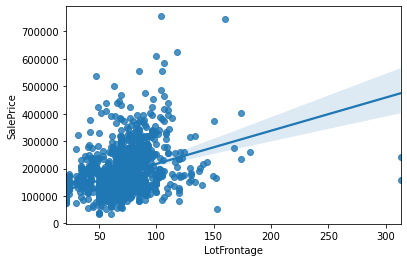

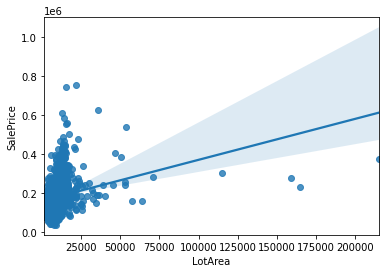

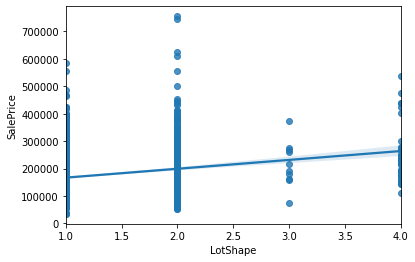

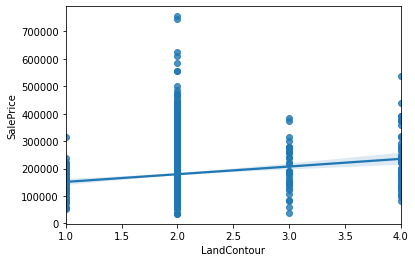

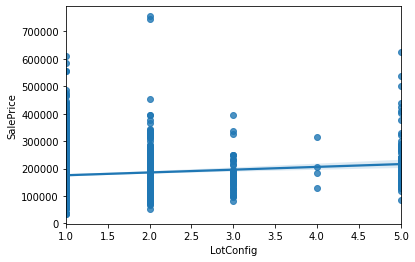

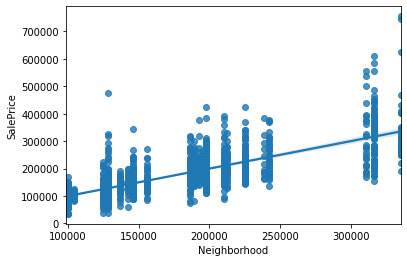

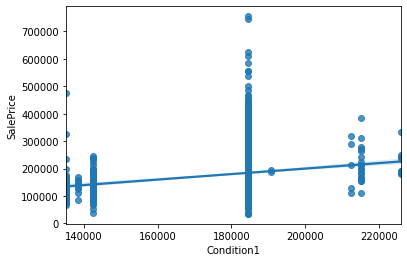

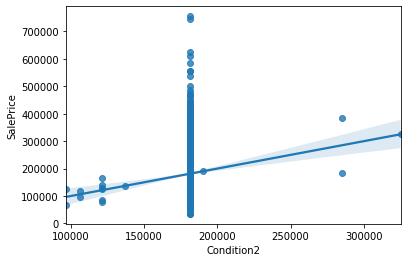

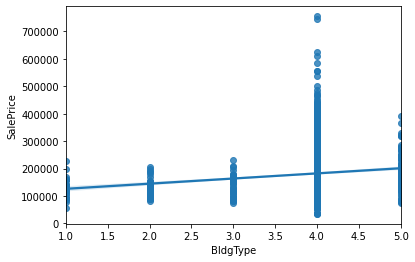

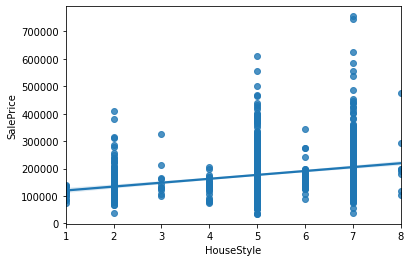

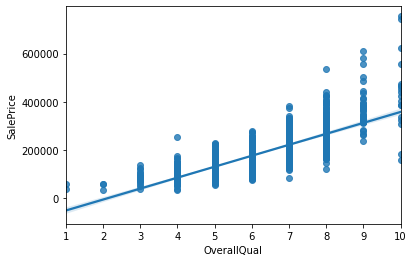

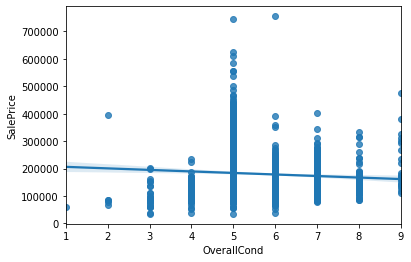

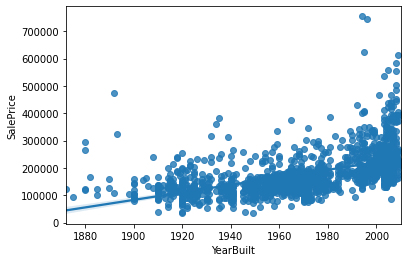

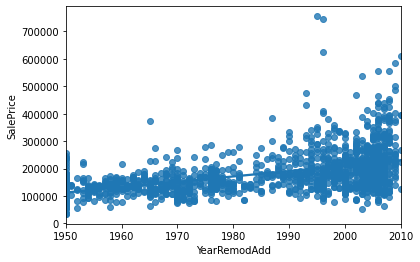

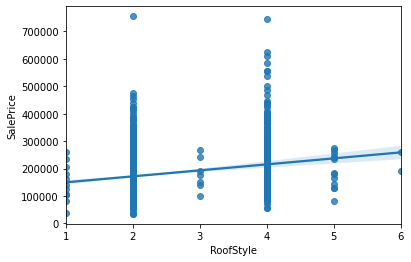

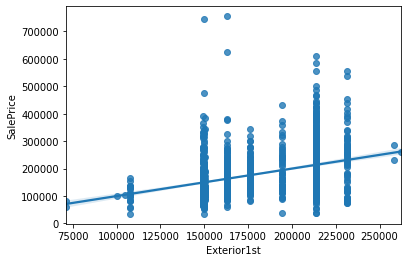

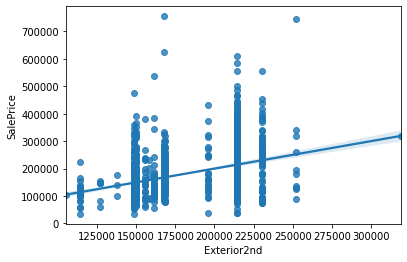

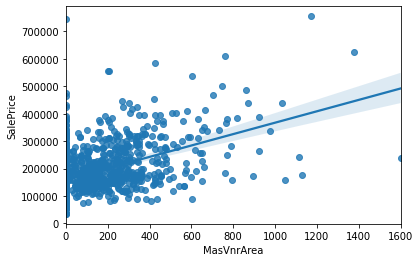

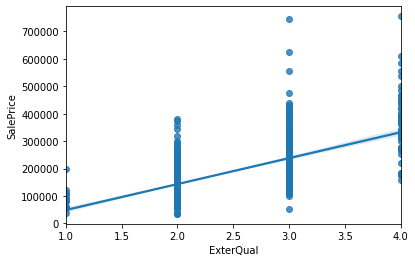

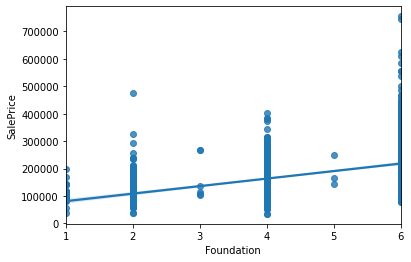

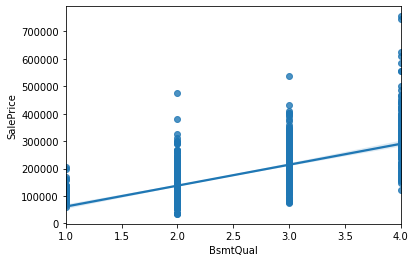

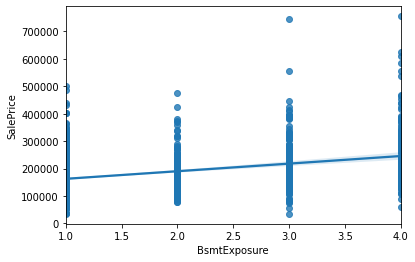

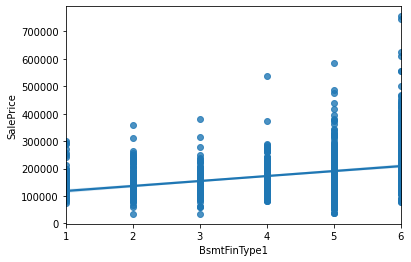

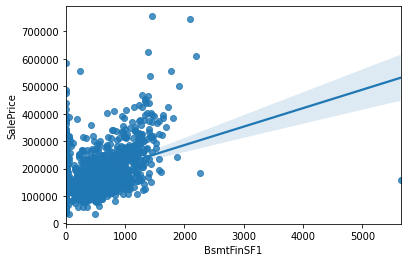

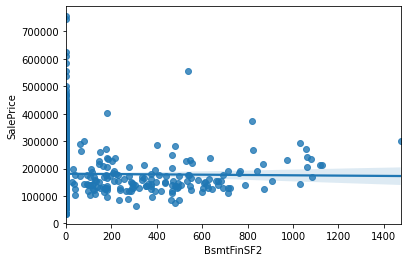

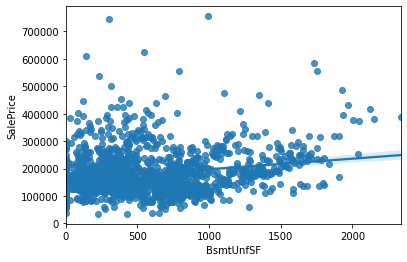

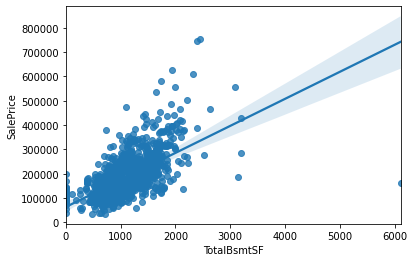

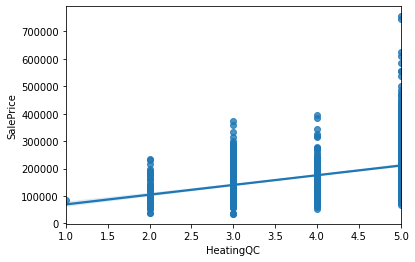

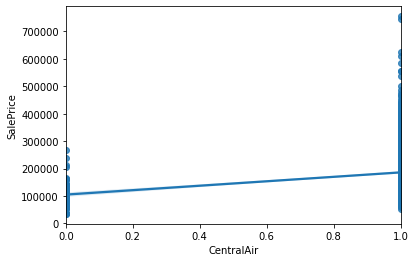

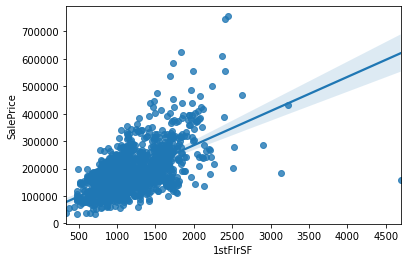

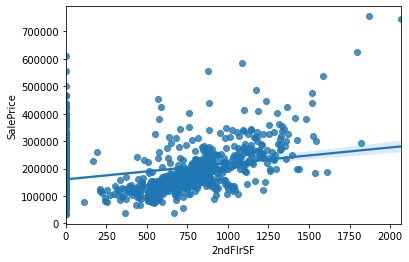

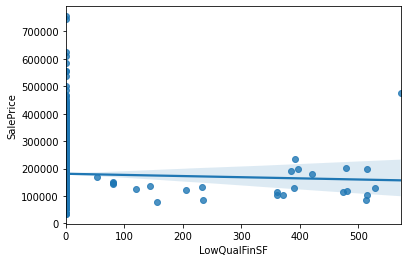

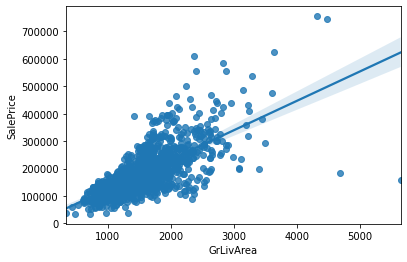

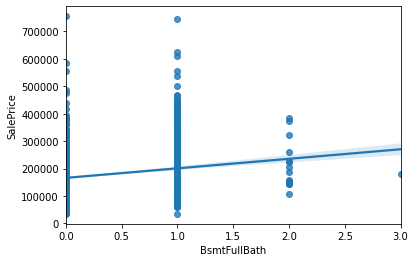

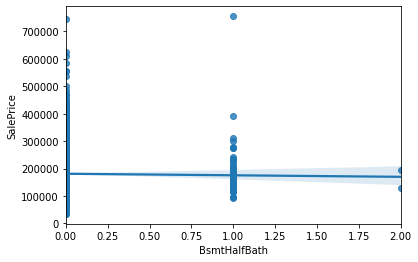

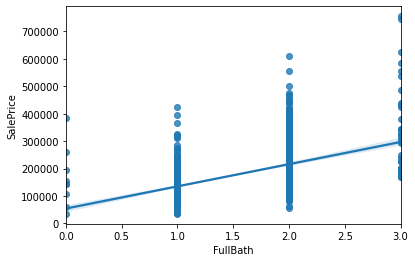

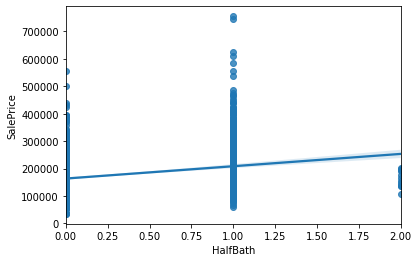

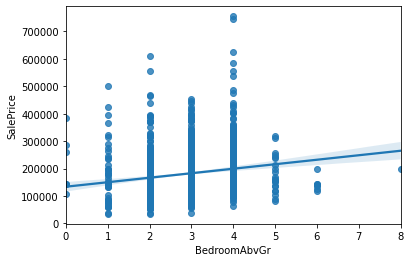

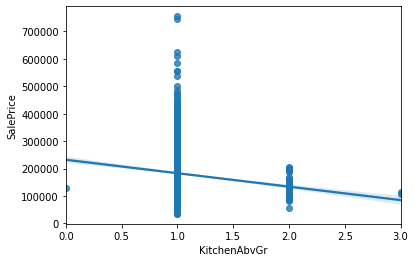

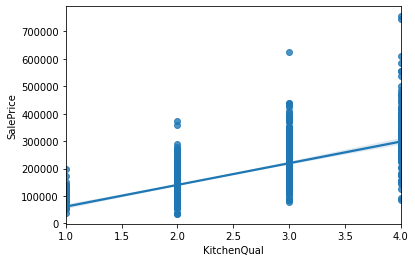

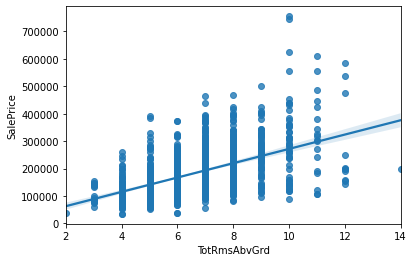

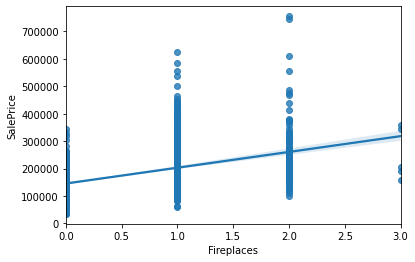

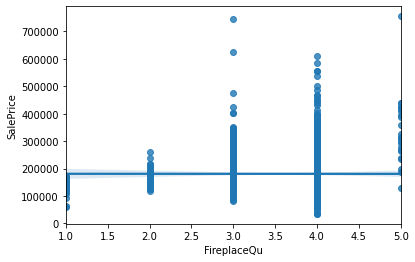

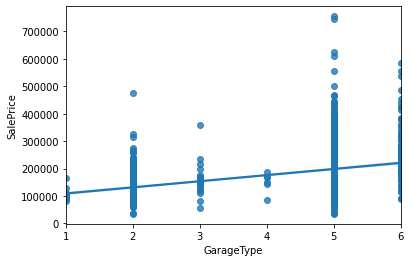

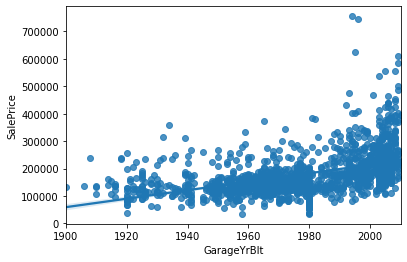

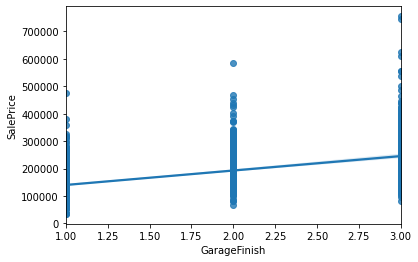

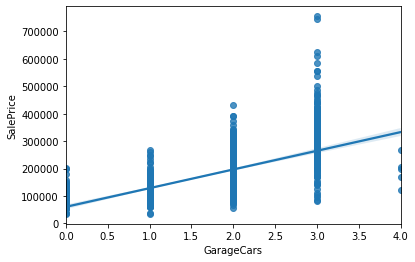

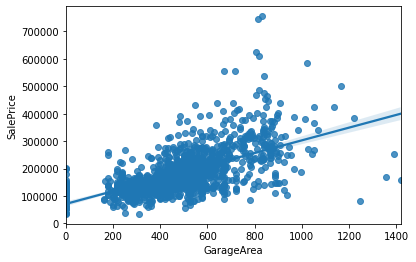

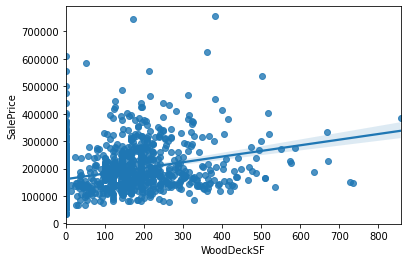

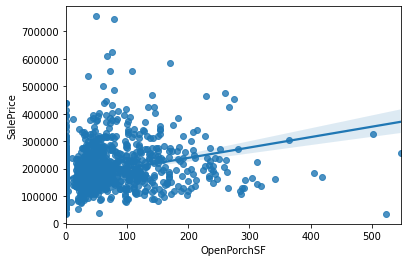

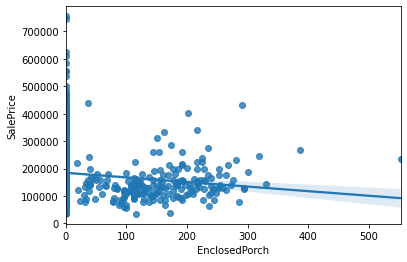

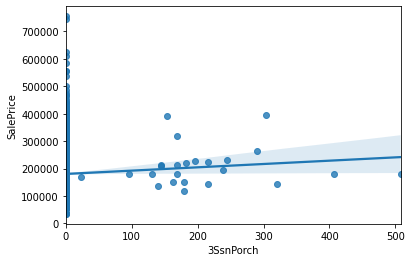

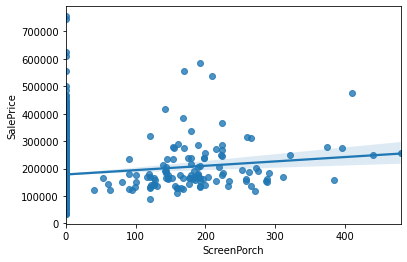

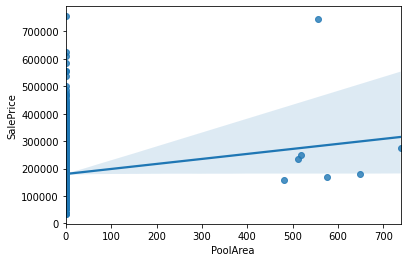

In [231]:
for col in data.columns:
  if col != 'SalePrice':
    sns.regplot(data[col],data['SalePrice'],data=data)
    plt.show()

In [232]:
data.drop(columns=['BsmtFinSF2','BsmtUnfSF','LowQualFinSF','BsmtHalfBath','FireplaceQu'],inplace=True)

In [233]:
y = data['SalePrice']
x = data.iloc[:,:len([i for i in data.columns])-1]

In [234]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [235]:
#y = scalar.fit_transform(np.array(y).reshape(-1,1))
#x = scalar.fit_transform(x)

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=25)

In [238]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [239]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [240]:
from sklearn.metrics import r2_score

In [241]:
score = r2_score(y_test,y_pred)

In [242]:
f'model score is {score*100}'

'model score is 84.53190699271464'

In [243]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV

In [244]:
#parameters = {'alpha':range(1,25,1),'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
parameters = {'n_estimators':range(10,200,25),'random_state':range(1,100,10)}

In [245]:
grid_cv = grid(model,parameters,n_jobs=-1,cv=10)

In [246]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [247]:
grid_cv.best_score_

0.865855473950696

In [248]:
grid_cv.best_params_

{'n_estimators': 185, 'random_state': 71}